In [13]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf
from pandas.plotting import scatter_matrix

In [2]:
!pip install yfinance

In [3]:
!pip install mplfinance

In [4]:
import yfinance as yf
%matplotlib inline

In [5]:
data = yf.download('AAPL', start='2023-05-10', end='2024-05-10')

df = pd.DataFrame(data)

df.head()drop 

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-10,173.020004,174.029999,171.899994,173.559998,172.404678,53724500
2023-05-11,173.850006,174.589996,172.169998,173.750000,172.593399,49514700
2023-05-12,173.619995,174.059998,171.000000,172.570007,171.658356,45497800
2023-05-15,173.160004,173.210007,171.470001,172.070007,171.161026,37266700
2023-05-16,171.990005,173.139999,171.800003,172.070007,171.161026,42110300


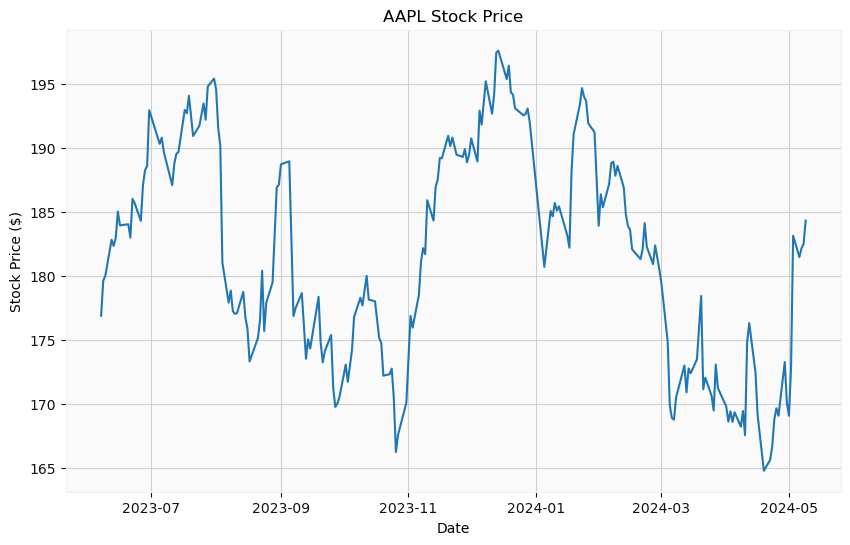

In [40]:
#PLT1
#Average price for Apple stock over a year
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Adj Close'], label='AAPL')
plt.title('AAPL Stock Price')
plt.xlabel('Date')
plt.ylabel('Stock Price ($)')
plt.grid(True)
plt.show()

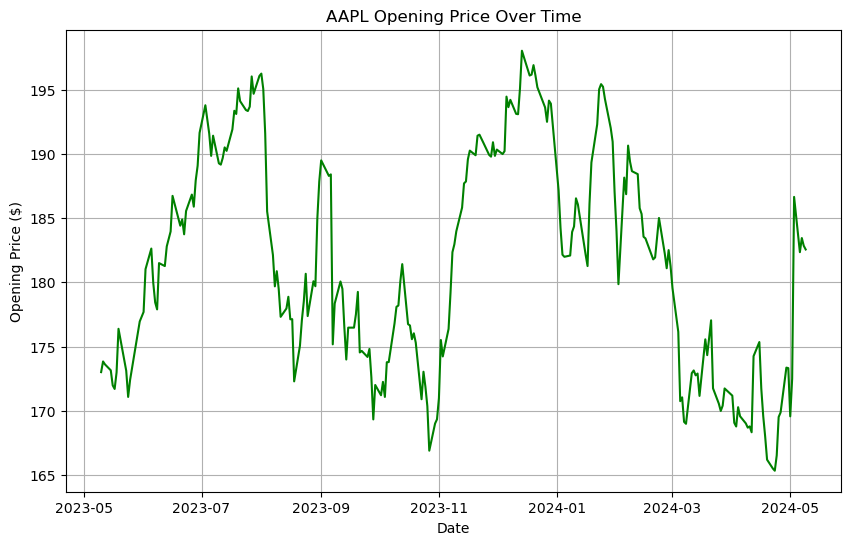

In [7]:
#PLT2
#Line Chart: Plot the opening price of the stock over time.
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Open'], color='green')
plt.title('AAPL Opening Price Over Time')
plt.xlabel('Date')
plt.ylabel('Opening Price ($)')
plt.grid(True)
plt.show()

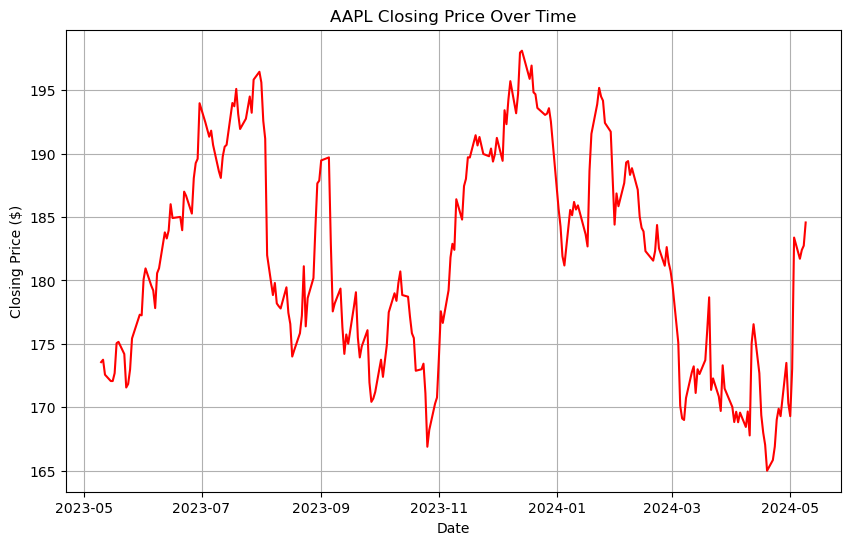

In [8]:
#PLT3
#Line Chart: Plot the closing price of the stock over time.
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], color='red')
plt.title('AAPL Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

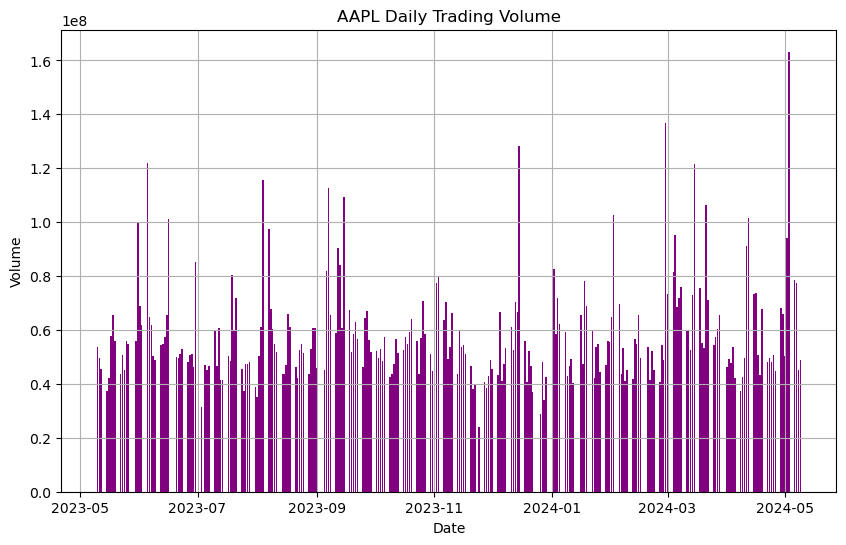

In [11]:
#PLT4
#Bar Chart: Show the daily trading volume.
plt.figure(figsize=(10,6))
plt.bar(df.index, df['Volume'], color='purple')
plt.title('AAPL Daily Trading Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

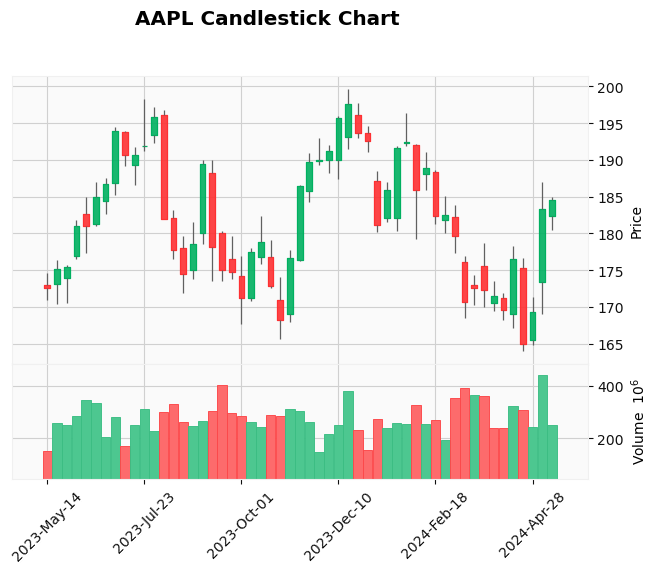

In [14]:
#PLT5
#Candlestick Chart: Display the open, high, low, and close prices for each day in a candlestick format, which is commonly used in stock market analysis.
df_resampled = df.resample('W').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})

df_resampled.reset_index(inplace=True)
df_resampled.set_index('Date', inplace=True)

plt.figure(figsize=(10,6))
mpf.plot(df_resampled, type='candle', volume=True, style='yahoo', title='AAPL Candlestick Chart')
plt.show()

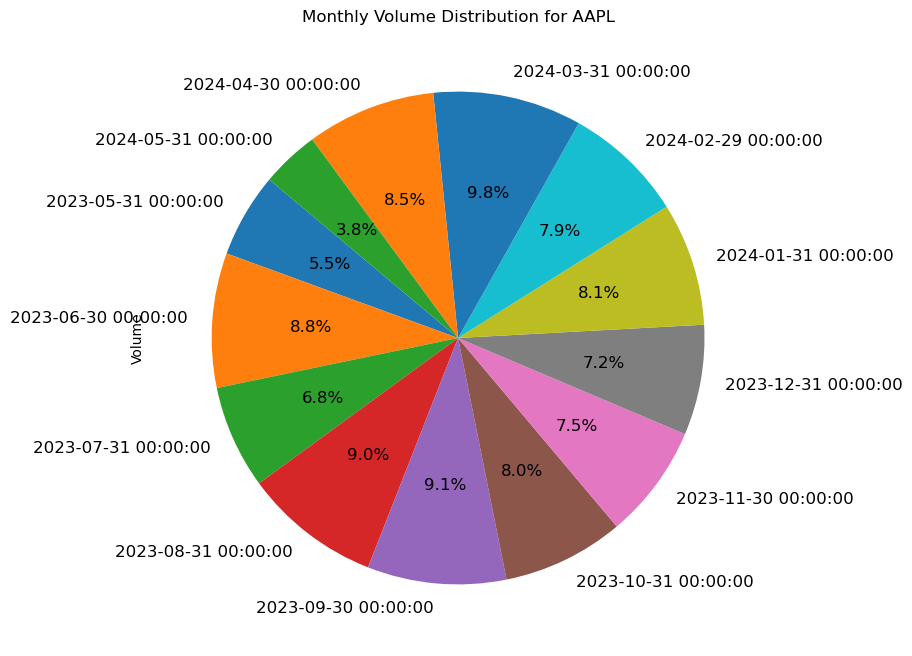

In [15]:
##PLT6
#Pie plot: Volume of Apple stocks traded each month
monthly_volume = df['Volume'].resample('M').sum()
plt.figure(figsize=(8, 8))
monthly_volume.plot(kind='pie', autopct='%1.1f%%', startangle=140, fontsize=12)
plt.title('Monthly Volume Distribution for AAPL')
plt.show()

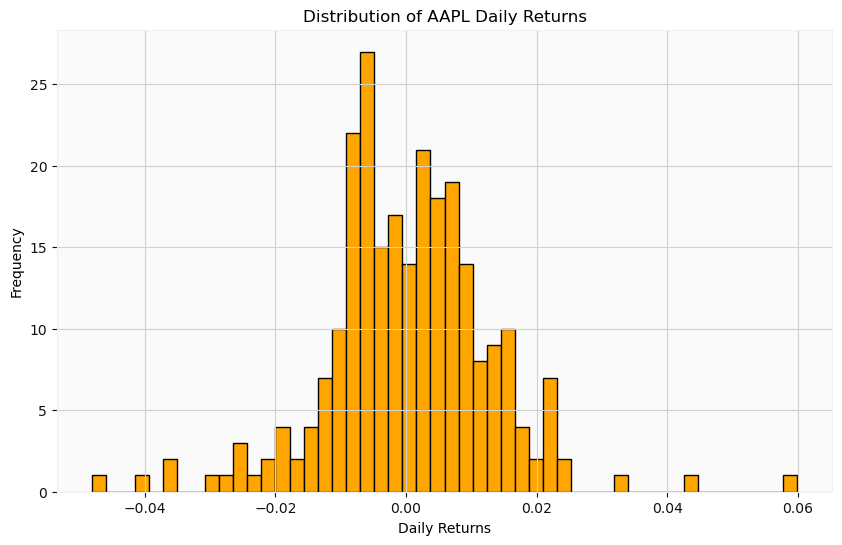

In [16]:
#PLT7
#Histogram: Visualize the distribution of daily returns.
returns = df['Close'].pct_change().dropna()

plt.figure(figsize=(10,6))
plt.hist(returns, bins=50, color='orange', edgecolor='black')
plt.title('Distribution of AAPL Daily Returns')
plt.xlabel('Daily Returns')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

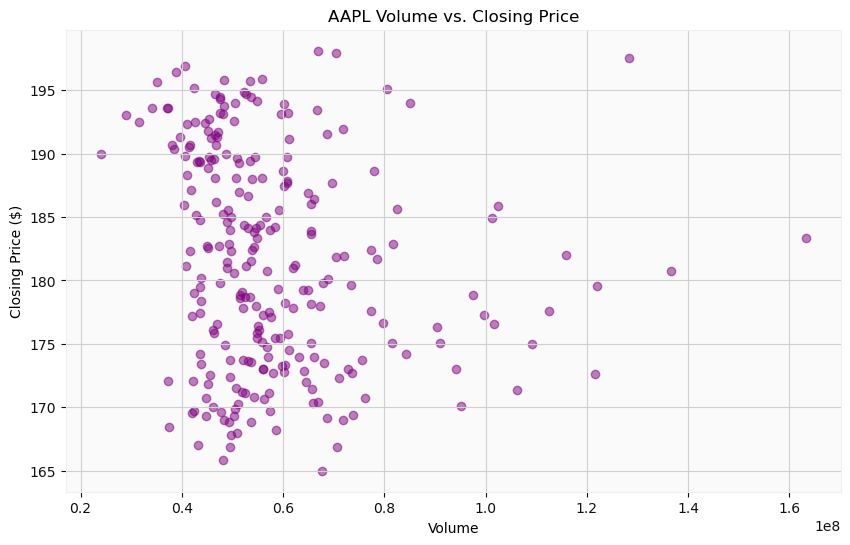

In [21]:
#PLT8
#Scatter Plot: Plot the relationship between the volume and price of the stock.
plt.figure(figsize=(10,6))
plt.scatter(df['Volume'], df['Close'], color='purple', alpha=0.5)
plt.title('AAPL Volume vs. Closing Price')
plt.xlabel('Volume')
plt.ylabel('Closing Price ($)')
plt.grid(True)
plt.show()

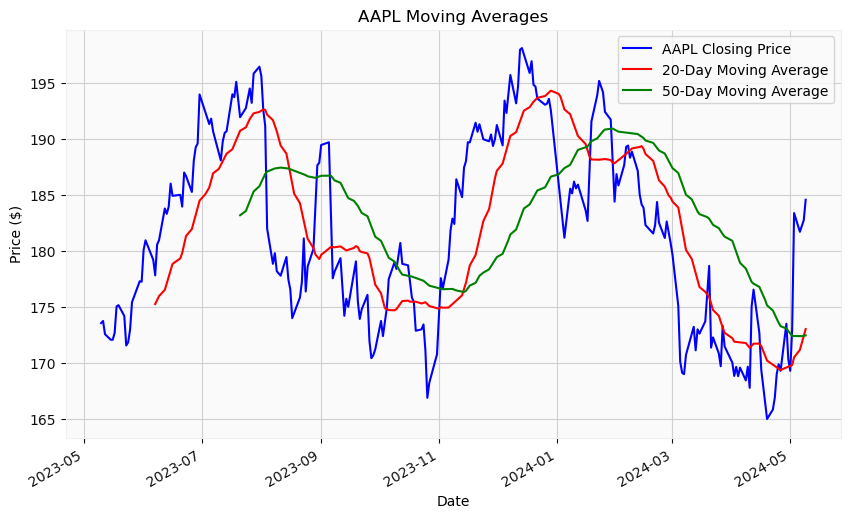

In [22]:
#PLT9
#Moving Averages
plt.figure(figsize=(10,6))
df['Close'].plot(label='AAPL Closing Price', color='blue')
df['Close'].rolling(window=20).mean().plot(label='20-Day Moving Average', color='red')
df['Close'].rolling(window=50).mean().plot(label='50-Day Moving Average', color='green')
plt.title('AAPL Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

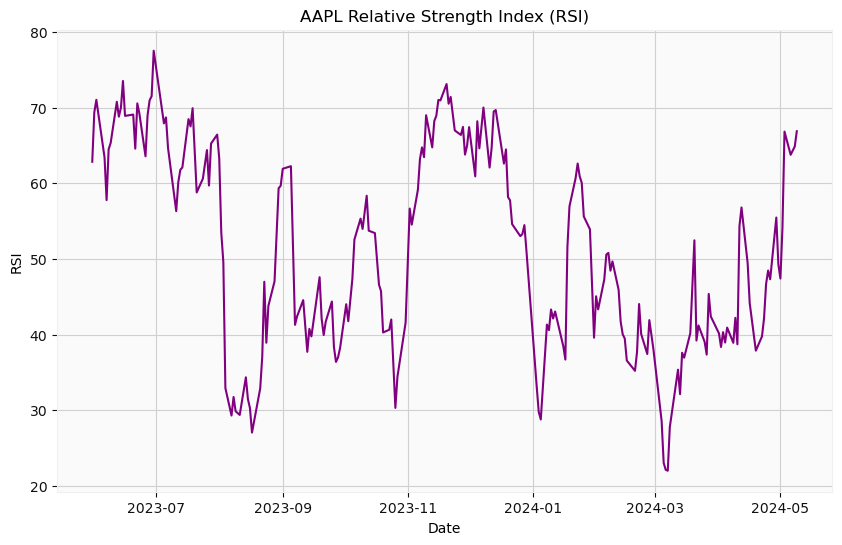

In [23]:
#PLT10
import talib
#used to identify overbought or oversold conditions in a stock.
df['RSI'] = talib.RSI(df['Close'], timeperiod=14)

plt.figure(figsize=(10,6))
plt.plot(df.index, df['RSI'], color='purple')
plt.title('AAPL Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.grid(True)
plt.show()

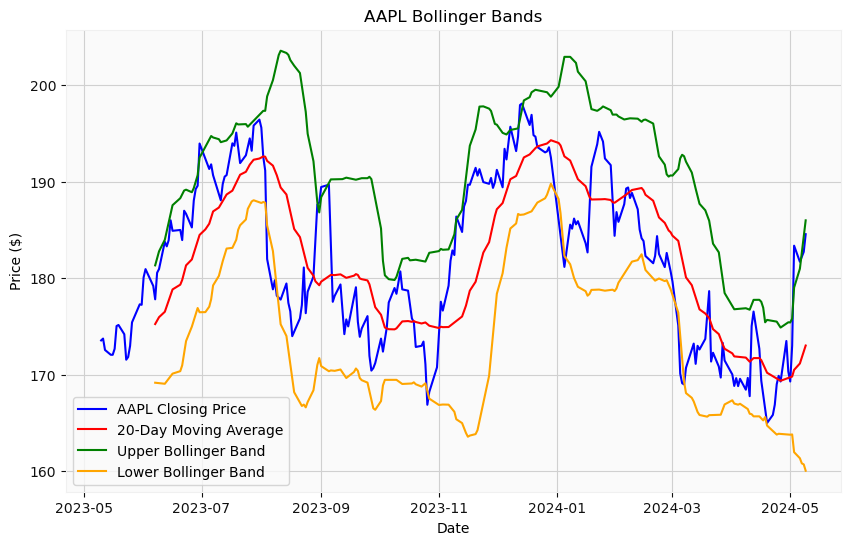

In [24]:
#PLT11
#Same as RSI but for moving averages.
df['MA20'] = df['Close'].rolling(window=20).mean()
df['Upper'] = df['MA20'] + 2 * df['Close'].rolling(window=20).std()
df['Lower'] = df['MA20'] - 2 * df['Close'].rolling(window=20).std()

plt.figure(figsize=(10,6))
plt.plot(df.index, df['Close'], label='AAPL Closing Price', color='blue')
plt.plot(df.index, df['MA20'], label='20-Day Moving Average', color='red')
plt.plot(df.index, df['Upper'], label='Upper Bollinger Band', color='green')
plt.plot(df.index, df['Lower'], label='Lower Bollinger Band', color='orange')
plt.title('AAPL Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

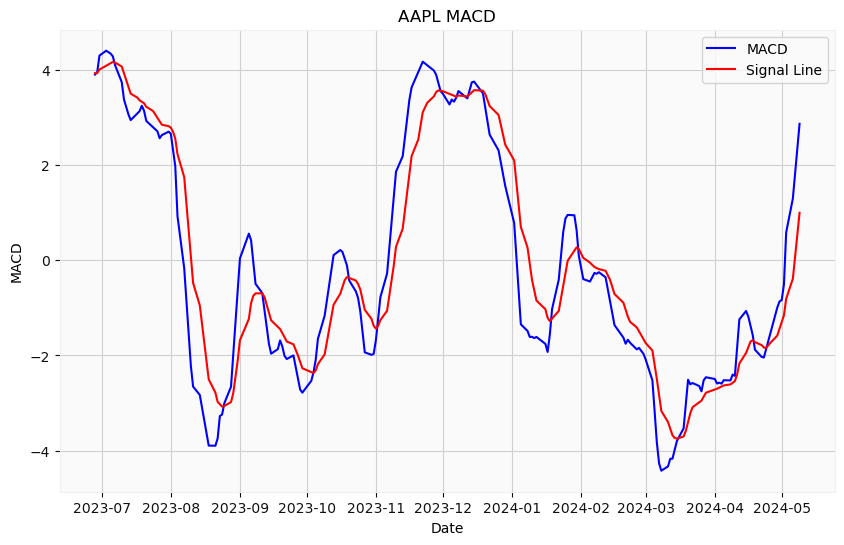

In [25]:
#PLT12
#measures the relationship between two moving averages of a security's price.
macd, signal, _ = talib.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

plt.figure(figsize=(10,6))
plt.plot(df.index, macd, label='MACD', color='blue')
plt.plot(df.index, signal, label='Signal Line', color='red')
plt.title('AAPL MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.grid(True)
plt.show()

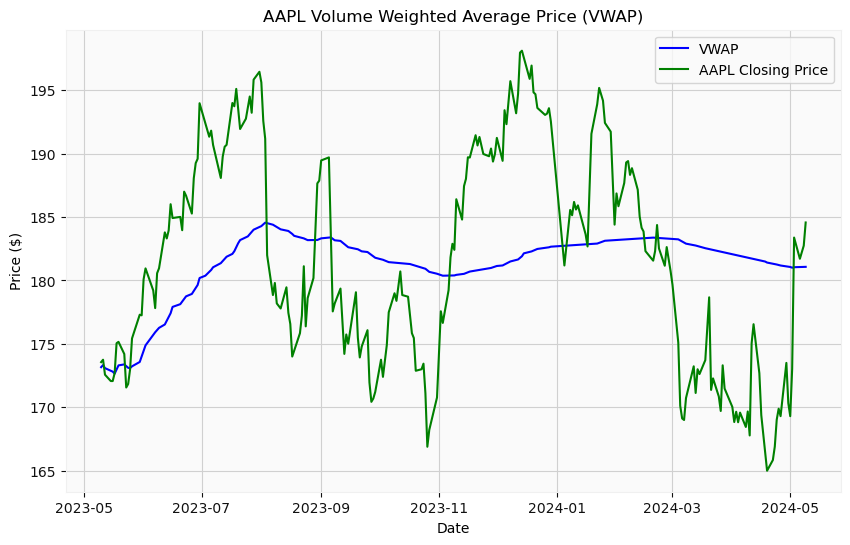

In [26]:
#PLT13
#calculated by dividing the total traded value by the total volume traded over a specific time period, often used as a trading benchmark.
df['VWAP'] = (df['Volume'] * (df['High'] + df['Low'] + df['Close']) / 3).cumsum() / df['Volume'].cumsum()

plt.figure(figsize=(10,6))
plt.plot(df.index, df['VWAP'], label='VWAP', color='blue')
plt.plot(df.index, df['Close'], label='AAPL Closing Price', color='green')
plt.title('AAPL Volume Weighted Average Price (VWAP)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [28]:
#Importing more stocks into the data frame
data_aapl = yf.download('AAPL', start='2023-05-10', end='2024-05-10')
df_aapl = pd.DataFrame(data_aapl)

data_msft = yf.download('MSFT', start='2023-05-10', end='2024-05-10')
df_msft = pd.DataFrame(data_msft)

data_amzn = yf.download('AMZN', start='2023-05-10', end='2024-05-10')
df_amzn = pd.DataFrame(data_amzn)

data_goog = yf.download('GOOG', start='2023-05-10', end='2024-05-10')
df_goog = pd.DataFrame(data_goog)

# Concatenate the DataFrames
frames = [df_aapl, df_msft, df_amzn, df_goog]
df_combined = pd.concat(frames, keys=['AAPL', 'MSFT', 'AMZN', 'GOOG'])

print(df_combined.head())

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
                       Open        High         Low       Close   Adj Close  \
     Date                                                                     
AAPL 2023-05-10  173.020004  174.029999  171.899994  173.559998  172.404663   
     2023-05-11  173.850006  174.589996  172.169998  173.750000  172.593399   
     2023-05-12  173.619995  174.059998  171.000000  172.570007  171.658356   
     2023-05-15  173.160004  173.210007  171.470001  172.070007  171.161026   
     2023-05-16  171.990005  173.139999  171.800003  172.070007  171.161026   

                   Volume  
     Date                  
AAPL 2023-05-10  53724500  
     2023-05-11  49514700  
     2023-05-12  45497800  
     2023-05-15  37266700  
  

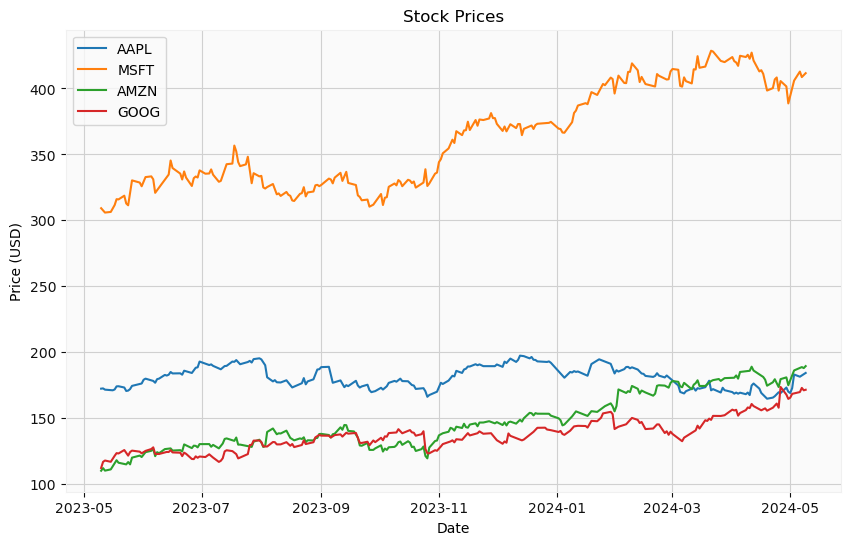

In [41]:
#PLT14
#Average price for all stocks over a year
frames = [df_aapl, df_msft, df_amzn, df_goog]
df_combined = pd.concat(frames, keys=['AAPL', 'MSFT', 'AMZN', 'GOOG'])

# Plotting
plt.figure(figsize=(10, 6))
for stock in ['AAPL', 'MSFT', 'AMZN', 'GOOG']:
    plt.plot(df_combined.loc[stock].index, df_combined.loc[stock]['Adj Close'], label=stock)

plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

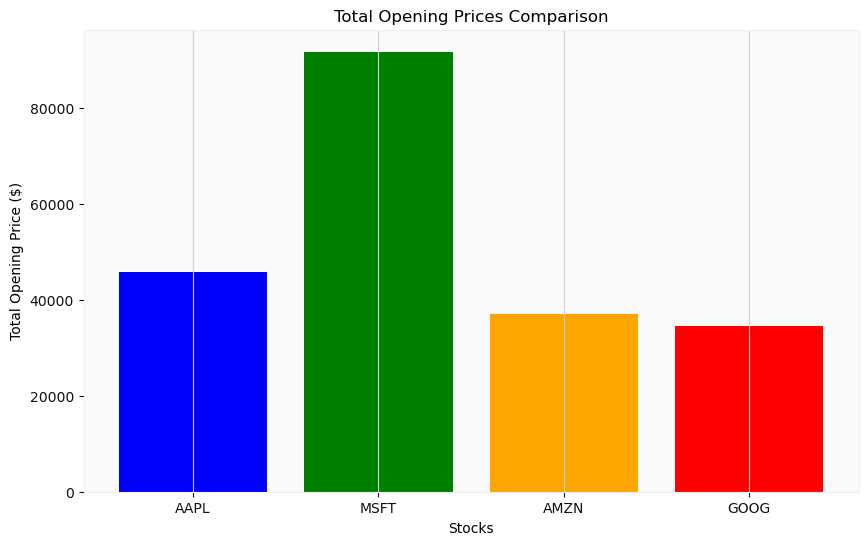

In [29]:
#PLT15
#Comparing total opening prices between all stocks
total_opening_prices = {
    'AAPL': df_aapl['Open'].sum(),
    'MSFT': df_msft['Open'].sum(),
    'AMZN': df_amzn['Open'].sum(),
    'GOOG': df_goog['Open'].sum()
}

plt.figure(figsize=(10, 6))
plt.bar(total_opening_prices.keys(), total_opening_prices.values(), color=['blue', 'green', 'orange', 'red'])
plt.title('Total Opening Prices Comparison')
plt.xlabel('Stocks')
plt.ylabel('Total Opening Price ($)')
plt.grid(axis='y')
plt.show()

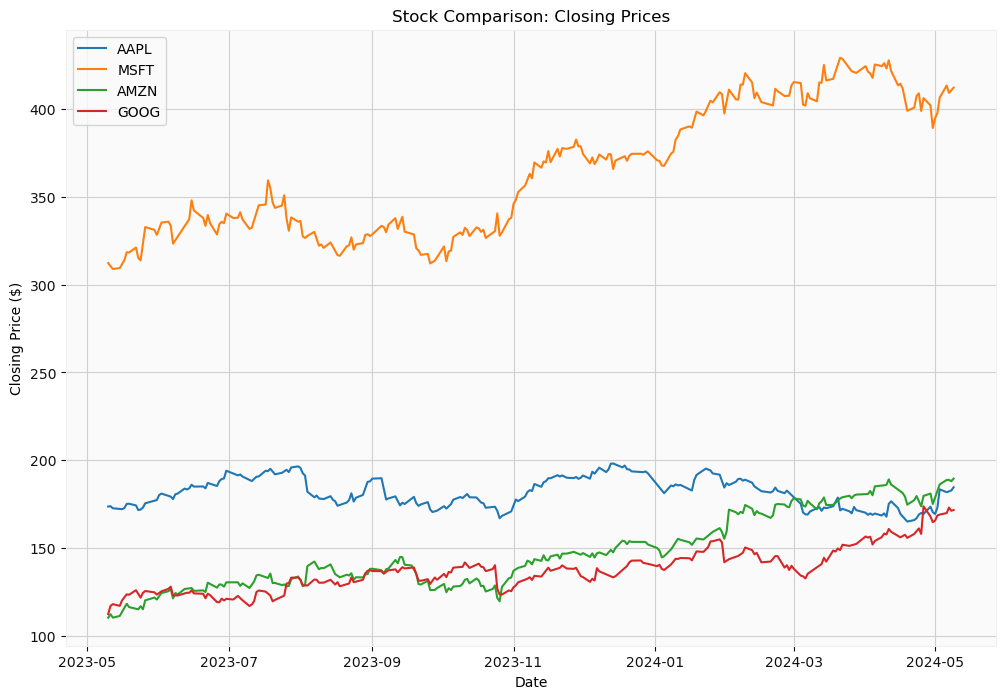

In [30]:
#PLT16
#Histogram to compare the total opening prices between all stocks
plt.figure(figsize=(12, 8))

plt.plot(df_aapl.index, df_aapl['Close'], label='AAPL')
plt.plot(df_msft.index, df_msft['Close'], label='MSFT')
plt.plot(df_amzn.index, df_amzn['Close'], label='AMZN')
plt.plot(df_goog.index, df_goog['Close'], label='GOOG')

plt.title('Stock Comparison: Closing Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1000x600 with 0 Axes>

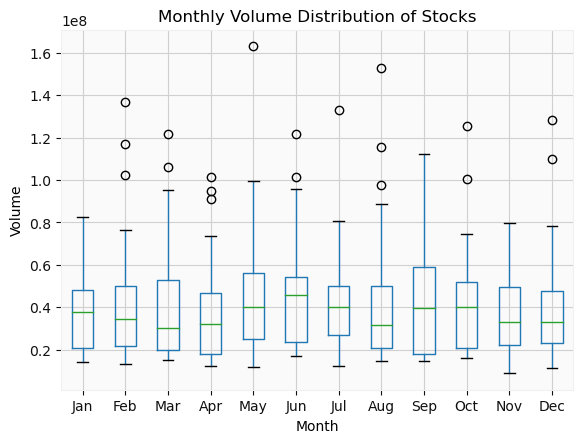

In [31]:
#PLT17
#Boxplot to compare the monthly volume distribution of all stocks 
frames = [df_aapl, df_msft, df_amzn, df_goog]
df_combined = pd.concat(frames, keys=['AAPL', 'MSFT', 'AMZN', 'GOOG'])

df_combined.reset_index(inplace=True)

df_combined['Month'] = df_combined['Date'].dt.month

plt.figure(figsize=(10, 6))
df_combined.boxplot(column='Volume', by='Month', grid=True)
plt.title('Monthly Volume Distribution of Stocks')
plt.xlabel('Month')
plt.ylabel('Volume')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.suptitle('')
plt.show()

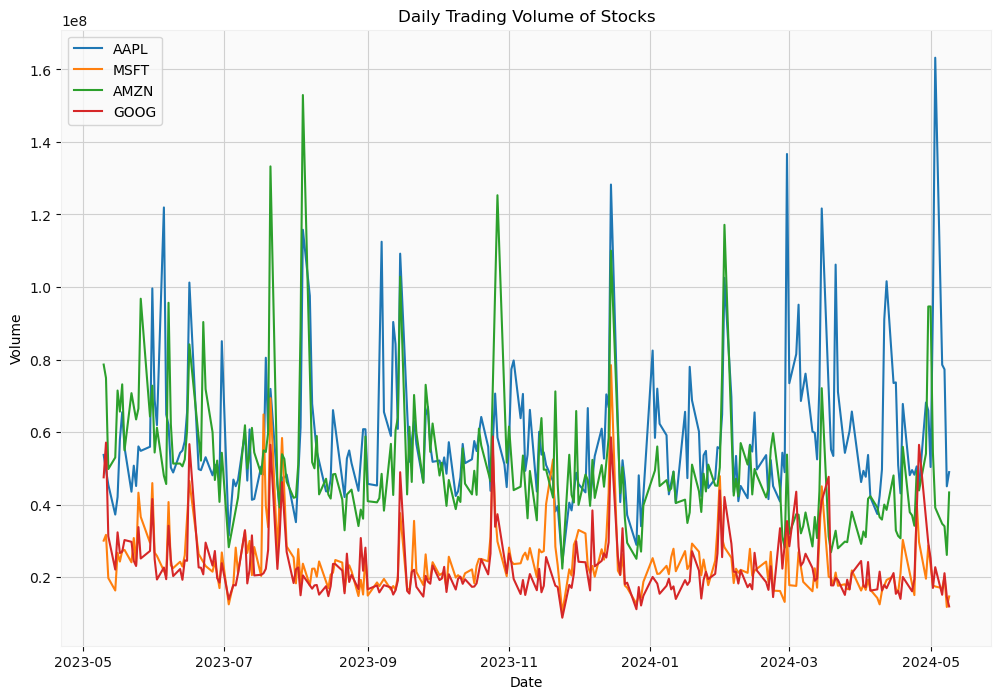

In [32]:
#PLT18
#Comparing the daily trading volume of each stock
plt.figure(figsize=(12, 8))

plt.plot(df_aapl.index, df_aapl['Volume'], label='AAPL')
plt.plot(df_msft.index, df_msft['Volume'], label='MSFT')
plt.plot(df_amzn.index, df_amzn['Volume'], label='AMZN')
plt.plot(df_goog.index, df_goog['Volume'], label='GOOG')

plt.title('Daily Trading Volume of Stocks')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x800 with 0 Axes>

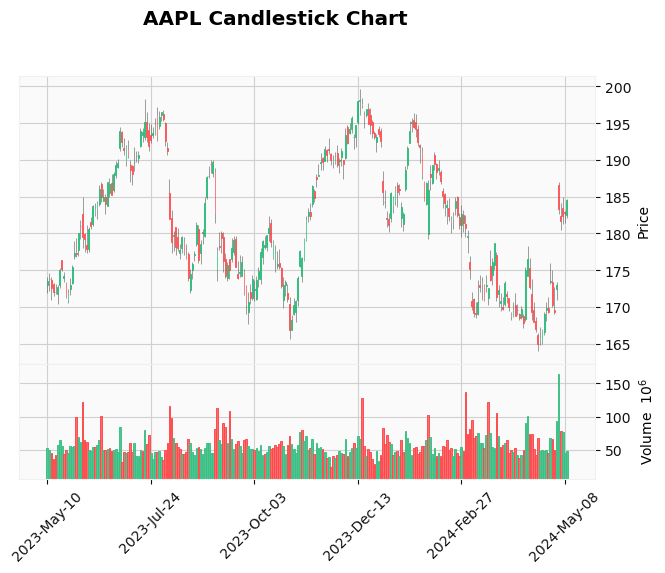

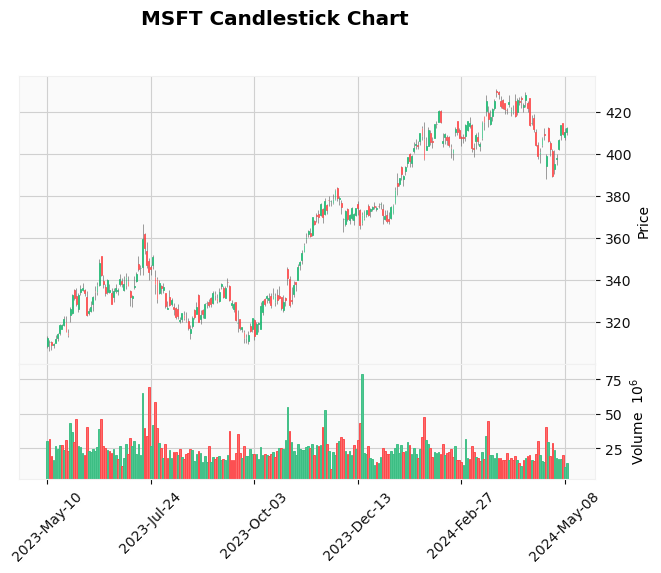

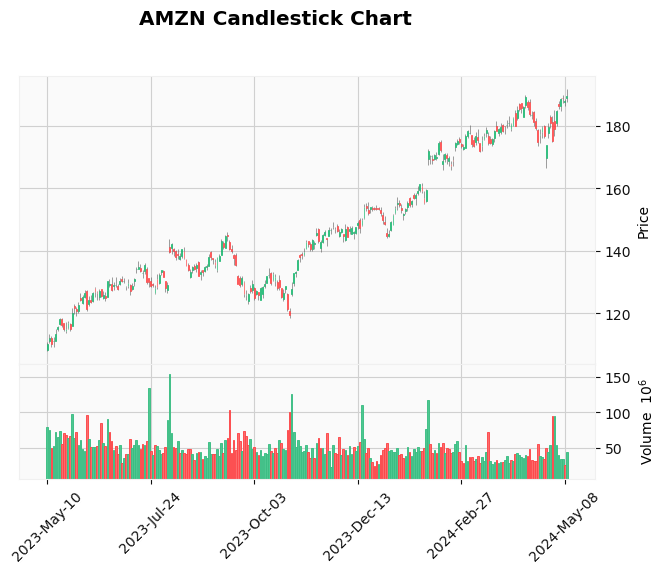

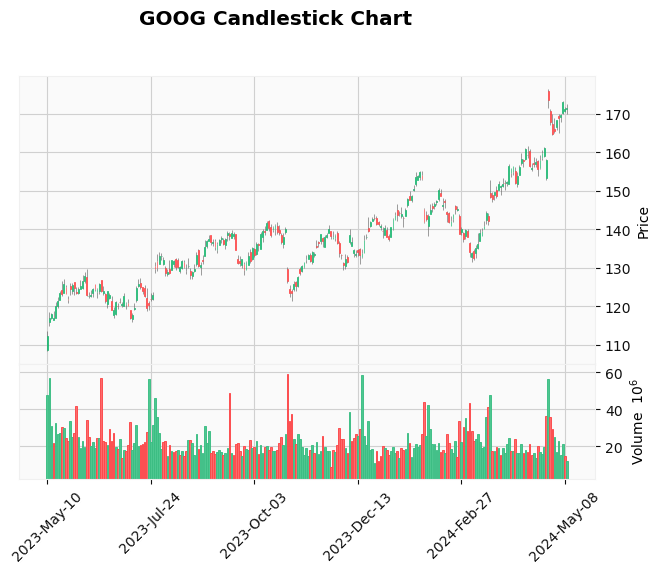

In [33]:
#PLT19
#Plotting a candlestick chart for each stock
plt.figure(figsize=(12, 8))

mpf.plot(df_aapl, type='candle', volume=True, style='yahoo', title='AAPL Candlestick Chart')
mpf.plot(df_msft, type='candle', volume=True, style='yahoo', title='MSFT Candlestick Chart')
mpf.plot(df_amzn, type='candle', volume=True, style='yahoo', title='AMZN Candlestick Chart')
mpf.plot(df_goog, type='candle', volume=True, style='yahoo', title='GOOG Candlestick Chart')

plt.show()

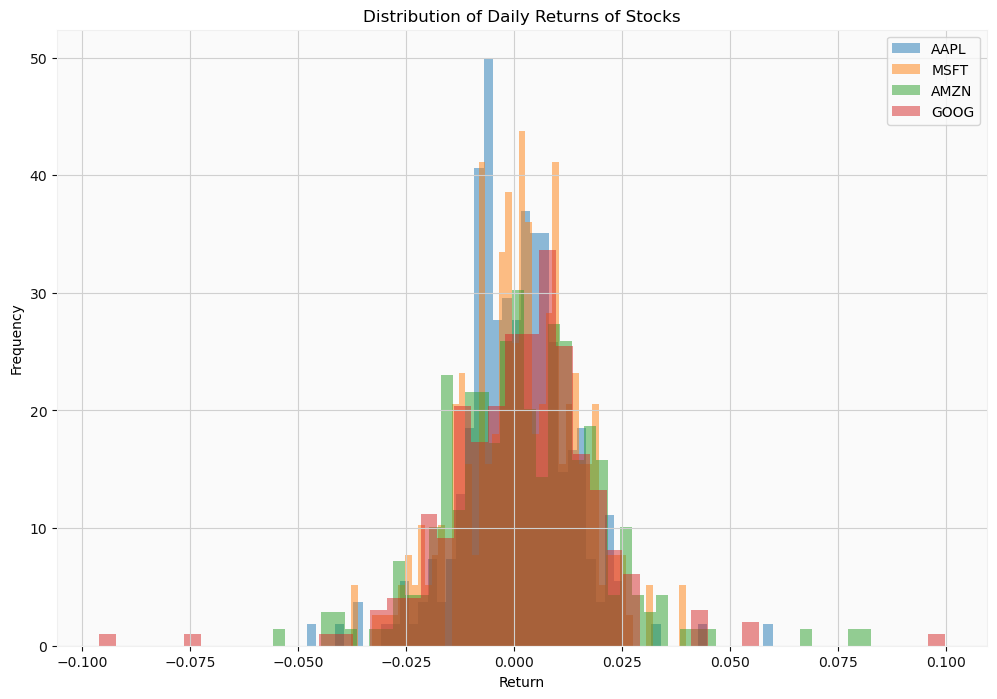

In [34]:
#PLT20
#Histogram for the distribution of daily return per stock
df_aapl['AAPL_Return'] = df_aapl['Adj Close'].pct_change()
df_msft['MSFT_Return'] = df_msft['Adj Close'].pct_change()
df_amzn['AMZN_Return'] = df_amzn['Adj Close'].pct_change()
df_goog['GOOG_Return'] = df_goog['Adj Close'].pct_change()

plt.figure(figsize=(12, 8))

plt.hist(df_aapl['AAPL_Return'].dropna(), bins=50, alpha=0.5, label='AAPL', density=True)
plt.hist(df_msft['MSFT_Return'].dropna(), bins=50, alpha=0.5, label='MSFT', density=True)
plt.hist(df_amzn['AMZN_Return'].dropna(), bins=50, alpha=0.5, label='AMZN', density=True)
plt.hist(df_goog['GOOG_Return'].dropna(), bins=50, alpha=0.5, label='GOOG', density=True)

plt.title('Distribution of Daily Returns of Stocks')
plt.xlabel('Return')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

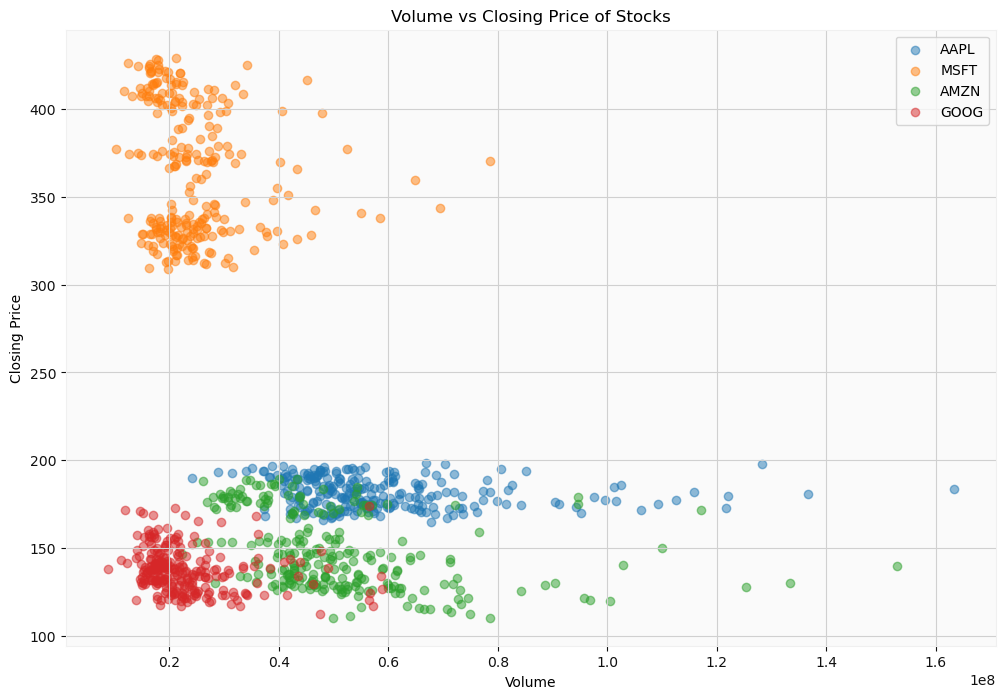

In [35]:
#PLT21
#Comparing the volume vs closing price ratio of each stock
plt.figure(figsize=(12, 8))

plt.scatter(df_aapl['Volume'], df_aapl['Close'], label='AAPL', alpha=0.5)
plt.scatter(df_msft['Volume'], df_msft['Close'], label='MSFT', alpha=0.5)
plt.scatter(df_amzn['Volume'], df_amzn['Close'], label='AMZN', alpha=0.5)
plt.scatter(df_goog['Volume'], df_goog['Close'], label='GOOG', alpha=0.5)

plt.title('Volume vs Closing Price of Stocks')
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

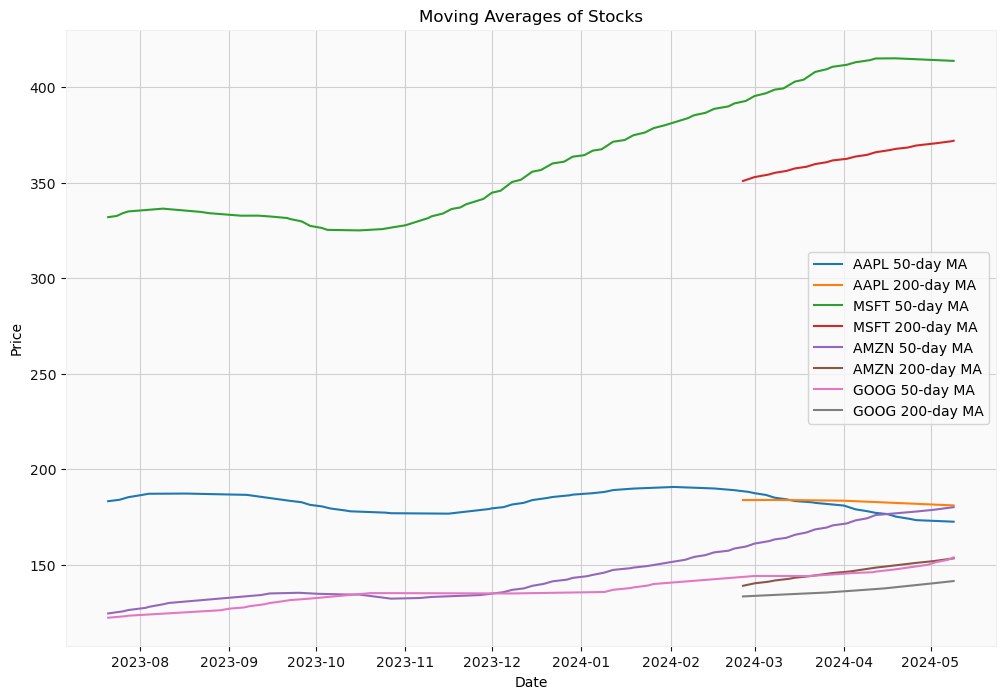

In [36]:
#PLT22
#Plotting the moving averages of each stock on a 50/200 day basis
df_aapl['MA50'] = df_aapl['Close'].rolling(window=50).mean()
df_aapl['MA200'] = df_aapl['Close'].rolling(window=200).mean()

df_msft['MA50'] = df_msft['Close'].rolling(window=50).mean()
df_msft['MA200'] = df_msft['Close'].rolling(window=200).mean()

df_amzn['MA50'] = df_amzn['Close'].rolling(window=50).mean()
df_amzn['MA200'] = df_amzn['Close'].rolling(window=200).mean()

df_goog['MA50'] = df_goog['Close'].rolling(window=50).mean()
df_goog['MA200'] = df_goog['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 8))

plt.plot(df_aapl.index, df_aapl['MA50'], label='AAPL 50-day MA')
plt.plot(df_aapl.index, df_aapl['MA200'], label='AAPL 200-day MA')

plt.plot(df_msft.index, df_msft['MA50'], label='MSFT 50-day MA')
plt.plot(df_msft.index, df_msft['MA200'], label='MSFT 200-day MA')

plt.plot(df_amzn.index, df_amzn['MA50'], label='AMZN 50-day MA')
plt.plot(df_amzn.index, df_amzn['MA200'], label='AMZN 200-day MA')

plt.plot(df_goog.index, df_goog['MA50'], label='GOOG 50-day MA')
plt.plot(df_goog.index, df_goog['MA200'], label='GOOG 200-day MA')

plt.title('Moving Averages of Stocks')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

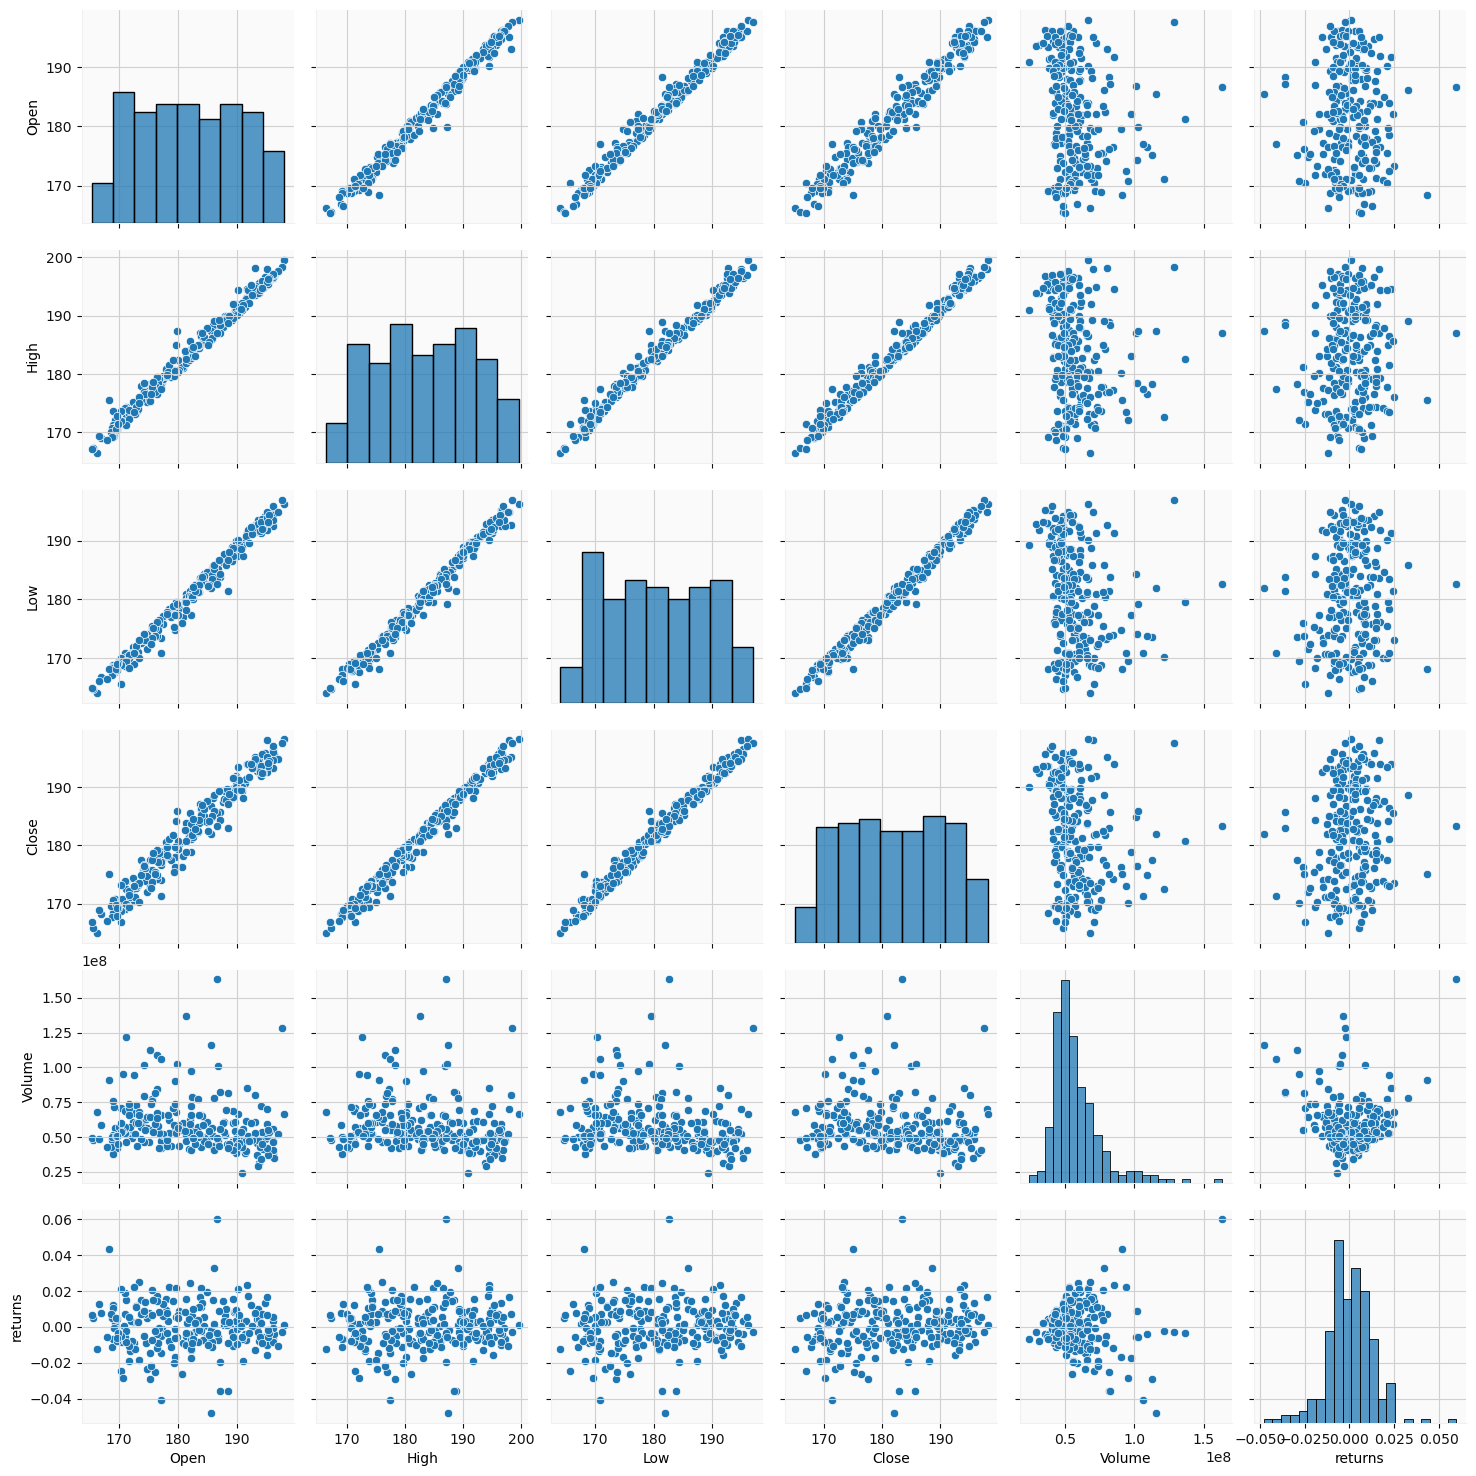

In [37]:
#PLt23
#Pairplot
df['returns'] = df['Close'].pct_change()
df.dropna(inplace=True)
sns.pairplot(df[['Open', 'High', 'Low', 'Close', 'Volume', 'returns']])
plt.show()